In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
scom_df = pd.read_csv('./output_files/SCom_stocks.csv')
scom_df.head()

,id,close,high,low,open,vp,vwap,previous,volume,DATE
0,60f7c017b6c609ad7cd0e2fe,42.60,42.70,42.50,42.5,0.0,42.60,42.60,76700,2021-07-21
1,60f5322eb6c609ad7cce4a07,42.60,42.90,41.75,42.9,0.0,42.60,42.60,5471700,2021-07-19
2,60f12897b6c609ad7cca854f,42.60,42.90,42.30,42.9,0.0,42.60,42.60,7553700,2021-07-16
3,60efd717b6c609ad7cc905f0,42.60,42.95,41.55,42.2,0.0,42.60,41.75,3754200,2021-07-15
4,60ee8597b6c609ad7cc79947,41.75,42.40,41.20,41.5,0.0,41.75,41.20,1736900,2021-07-14


In [3]:
scom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1706 non-null   object 
 1   close     1706 non-null   float64
 2   high      1706 non-null   float64
 3   low       1706 non-null   float64
 4   open      1706 non-null   float64
 5   vp        1706 non-null   float64
 6   vwap      1706 non-null   float64
 7   previous  1706 non-null   float64
 8   volume    1706 non-null   int64  
 9   DATE      1706 non-null   object 
dtypes: float64(7), int64(1), object(2)
memory usage: 133.4+ KB


In [4]:
#transform date  dtype  object to date
scom_df.rename(columns = {'DATE': 'date'}, inplace=True)
scom_df['date'] = pd.to_datetime(scom_df['date'])
scom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1706 entries, 0 to 1705
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id        1706 non-null   object        
 1   close     1706 non-null   float64       
 2   high      1706 non-null   float64       
 3   low       1706 non-null   float64       
 4   open      1706 non-null   float64       
 5   vp        1706 non-null   float64       
 6   vwap      1706 non-null   float64       
 7   previous  1706 non-null   float64       
 8   volume    1706 non-null   int64         
 9   date      1706 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 133.4+ KB


In [5]:
scom_df.drop(columns = ['id', 'vp'], inplace = True)

In [6]:
print(scom_df.shape)
scom_df.head()

(1706, 8)


,close,high,low,open,vwap,previous,volume,date
0,42.60,42.70,42.50,42.5,42.60,42.60,76700,2021-07-21
1,42.60,42.90,41.75,42.9,42.60,42.60,5471700,2021-07-19
2,42.60,42.90,42.30,42.9,42.60,42.60,7553700,2021-07-16
3,42.60,42.95,41.55,42.2,42.60,41.75,3754200,2021-07-15
4,41.75,42.40,41.20,41.5,41.75,41.20,1736900,2021-07-14


In [8]:
mask = (scom_df['date'] > '2019-01-01') & (scom_df['date'] <= '2021-07-31')
scom_df = scom_df.loc[mask]
scom_df.shape

(620, 8)

In [9]:
df = pd.DataFrame(index=range(0,len(scom_df)),columns=['date','close'])
for i in range(0,len(scom_df)):
    df["date"][i]=scom_df['date'][i]
    df["close"][i]=scom_df["close"][i]

df.index=df.date
df.drop("date",axis=1,inplace=True)
print(df.shape)
df.head()

(620, 1)


,close
date,
2021-07-21,42.6
2021-07-19,42.6
2021-07-16,42.6
2021-07-15,42.6
2021-07-14,41.75


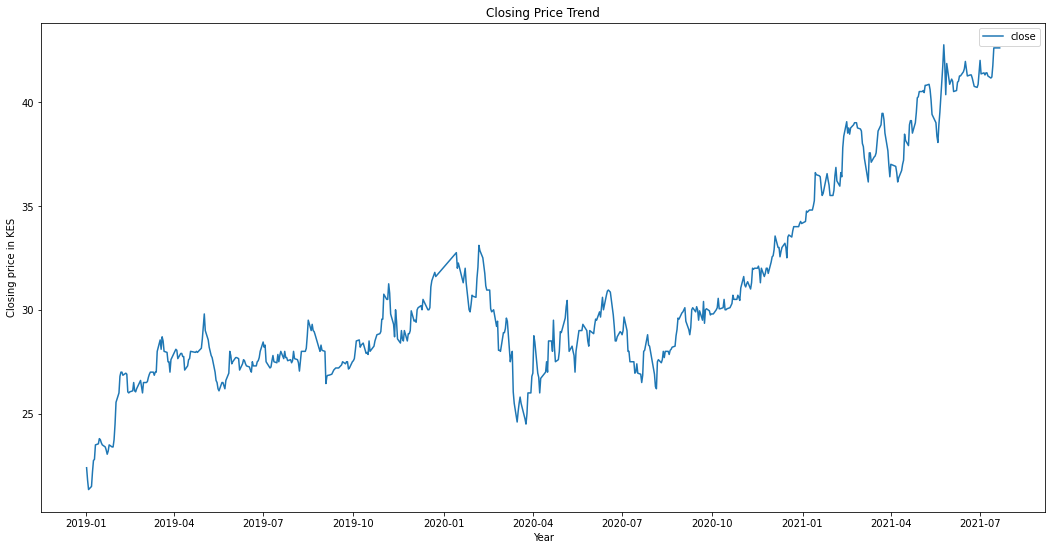

In [11]:
#plot the trend of the closing proce over the three years
scom_df = scom_df.sort_values(['date'])
plt.figure(figsize = (18,9))
plt.plot(scom_df['date'],scom_df['close'],label = 'close')
plt.xlabel("Year")
plt.ylabel("Closing price in KES")
plt.title("Closing Price Trend")
plt.legend()
plt.show()

In [13]:
#Defining  exponential moving average function
def EMA(data, window_size):
    ema_df = pd.Series(data["close"])

    #Calculate ema using pandas ewm function
    exponential_ma = ema_df.ewm(span = window_size, adjust = False).mean()
    #Parse the results as a new column in the existing data frame
    data["EMA"] = exponential_ma

    return data

In [14]:
#Exponential Moving Average wrt to Closing Price
EMA(df,30)
df.sort_index(ascending=True, axis=0).head()

,close,EMA
date,,
2019-01-02,22.4,23.710580
2019-01-03,21.8,23.800965
2019-01-04,21.35,23.938963
2019-01-07,21.5,24.117512
2019-01-08,22.2,24.298030


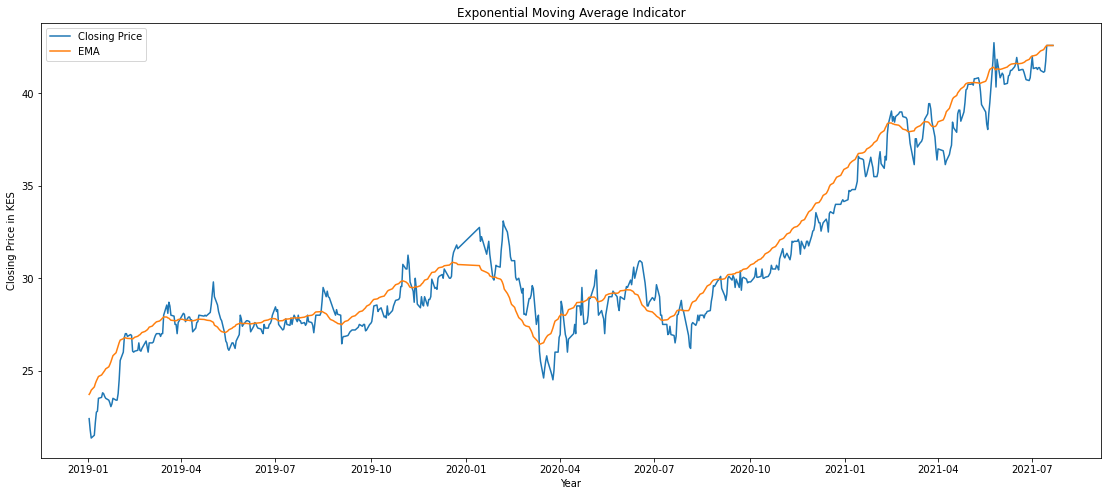

In [15]:
#Plotting Exponential Moving Average wrt to Closing Price

#Setting labels
plt.figure(figsize=(19,8))
plt.xlabel("Year")

plt.ylabel("Closing Price in KES")
plt.title("Exponential Moving Average Indicator")

#Let's go
plt.plot(df[['close', 'EMA']])
plt.legend(["Closing Price","EMA"])
plt.show()

In [16]:
def SMA(data, window_size):
    sma_df = pd.Series(data["close"])

    #Calculate sma using pandas rolling function
    simple_ma = sma_df.rolling(window = window_size).mean()
    #Parse the results as a new column in the existing data frame
    data["SMA"] = simple_ma

    return data

In [14]:
SMA(df, 30)
df.sort_index(ascending=True, axis=0).head()

,close,EMA,SMA
date,,,
2019-01-02,22.4,23.710580,24.033333
2019-01-03,21.8,23.800965,24.155000
2019-01-04,21.35,23.938963,24.295000
2019-01-07,21.5,24.117512,24.451667
2019-01-08,22.2,24.298030,24.605000


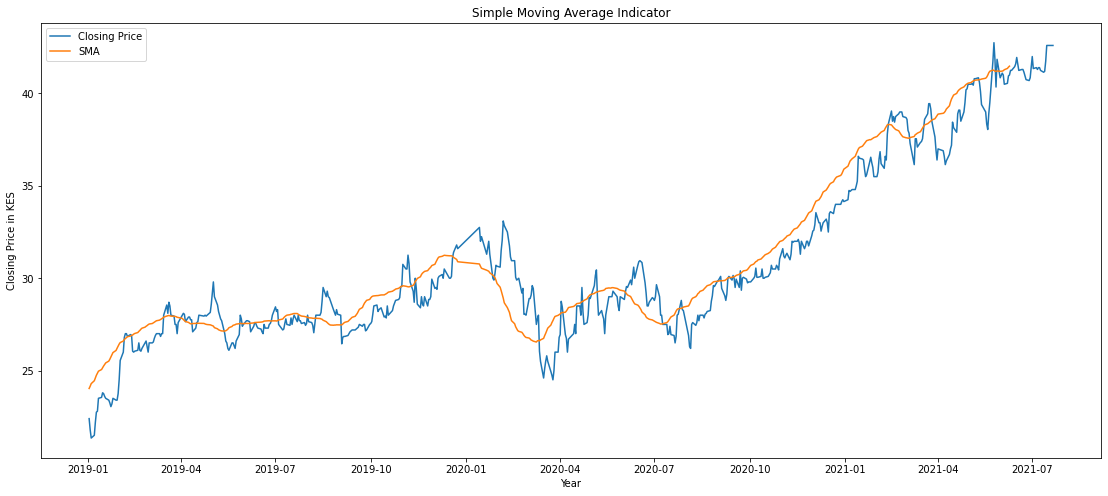

In [15]:
#Plotting Simple Moving Average wrt to Closing Price

#Setting labels
plt.figure(figsize=(19,8))
plt.xlabel("Year")

plt.ylabel("Closing Price in KES")
plt.title("Simple Moving Average Indicator")

#Let's go
plt.plot(df[['close', 'SMA']])
plt.legend(["Closing Price","SMA"])
plt.show()

### SMA vs EMA

SMA calculates the average of price data, while EMA gives more weight to current data. The newest price data will impact the moving average more, with older price data having a lesser impact.

### Simple Moving Average Trading Strategy

In [17]:
# Initialize the short and long windows
short_window = 20
long_window = 70

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=df.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = df['close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = df['close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
signals['positions'] = signals['signal'].diff()

# Print `signals`
print(signals)

            signal  short_mavg  long_mavg  positions
date                                                
2021-07-21     0.0     42.6000  42.600000        NaN
2021-07-19     0.0     42.6000  42.600000        0.0
2021-07-16     0.0     42.6000  42.600000        0.0
2021-07-15     0.0     42.6000  42.600000        0.0
2021-07-14     0.0     42.4300  42.430000        0.0
...            ...         ...        ...        ...
2019-01-08     0.0     23.6225  26.127857        0.0
2019-01-07     0.0     23.3975  26.040714        0.0
2019-01-04     0.0     23.1875  25.955714        0.0
2019-01-03     0.0     23.0525  25.880000        0.0
2019-01-02     0.0     22.9850  25.803571        0.0

[620 rows x 4 columns]


In [18]:
#buy
print(signals.loc[signals.positions == 1.0])

            signal  short_mavg  long_mavg  positions
date                                                
2020-06-18     1.0     28.6575  28.614286        1.0
2020-02-20     1.0     27.9350  27.830000        1.0
2019-08-05     1.0     28.2925  28.244286        1.0
2019-06-27     1.0     27.7550  27.737857        1.0
2019-04-23     1.0     27.6550  27.576429        1.0


In [19]:
#sell
print(signals.loc[signals.positions == -1.0])

            signal  short_mavg  long_mavg  positions
date                                                
2020-04-23     0.0     28.5700  28.627857       -1.0
2019-11-20     0.0     29.5400  29.601429       -1.0
2019-07-22     0.0     27.8925  27.897143       -1.0
2019-06-24     0.0     27.7025  27.711429       -1.0
2019-03-05     0.0     27.5225  27.550000       -1.0


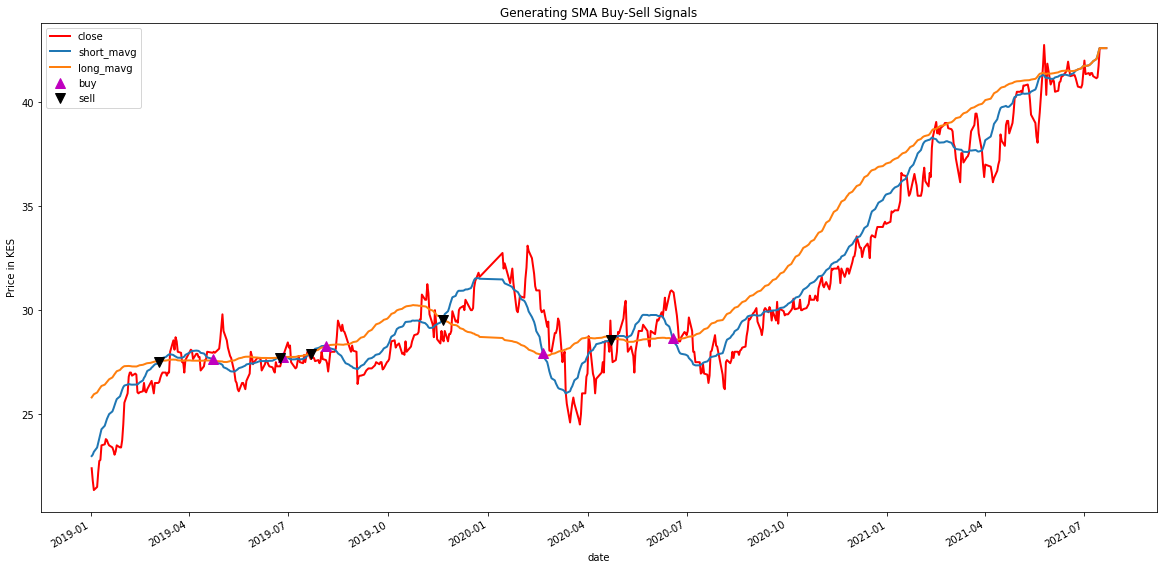

In [24]:
# Initialize the plot figure
fig = plt.figure(figsize=(20,10))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in KES')

# Plot the closing price
df['close'].plot(ax=ax1, lw=2., color='r')

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='m', label = "buy")
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index,
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10,
         color='k', label = "sell")

#Add chart title
plt.title("Generating SMA Buy-Sell Signals")
# Show the legend
plt.legend()         
# Show the plot
plt.show()

### Exponential Moving Average Trading Strategy

In [21]:
# Initialize the short and long windows
short_window = 20
long_window = 70

# Initialize the `signals` DataFrame with the `signal` column
esignals = pd.DataFrame(index=df.index)
esignals['signal'] = 0.0

# Create short simple moving average over the short window
esignals['short_mavg'] = df['close'].ewm(span=short_window, adjust=False).mean()

# Create long simple moving average over the long window
esignals['long_mavg'] = df['close'].ewm(span=long_window, adjust=False).mean()

# Create signals
esignals['signal'][short_window:] = np.where(esignals['short_mavg'][short_window:] 
                                            > esignals['long_mavg'][short_window:], 1.0, 0.0)   

# Generate trading orders
esignals['positions'] = esignals['signal'].diff()

# Print `signals`
print(esignals)

            signal  short_mavg  long_mavg  positions
date                                                
2021-07-21     0.0   42.600000  42.600000        NaN
2021-07-19     0.0   42.600000  42.600000        0.0
2021-07-16     0.0   42.600000  42.600000        0.0
2021-07-15     0.0   42.600000  42.600000        0.0
2021-07-14     0.0   42.519048  42.576056        0.0
...            ...         ...        ...        ...
2019-01-08     0.0   23.774635  25.553360        0.0
2019-01-07     0.0   23.558003  25.439181        0.0
2019-01-04     0.0   23.347717  25.323993        0.0
2019-01-03     0.0   23.200316  25.224725        0.0
2019-01-02     0.0   23.124095  25.145156        0.0

[620 rows x 4 columns]


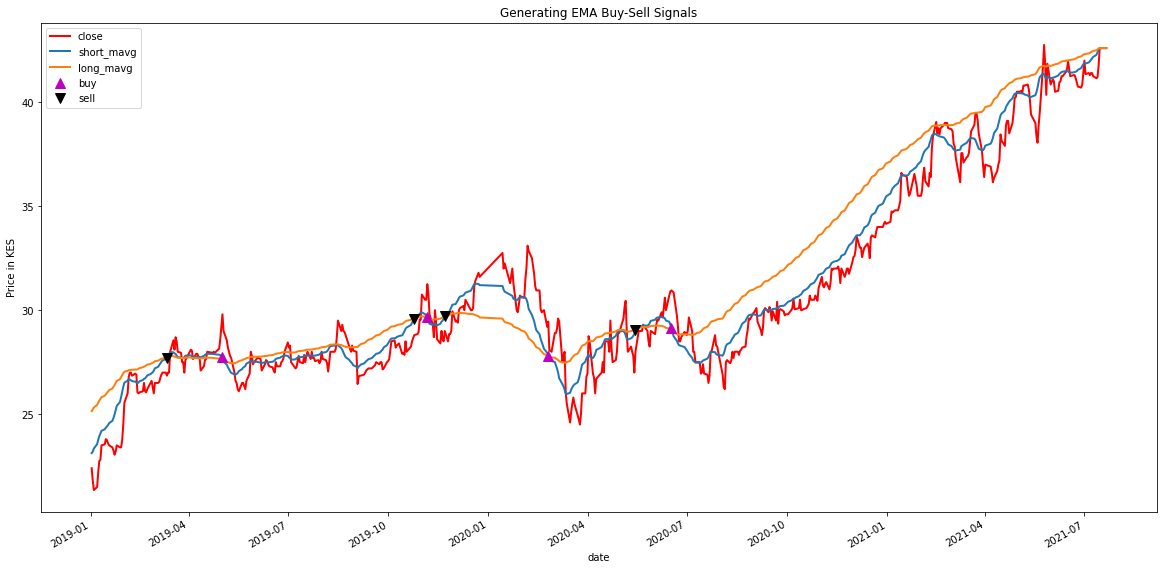

In [25]:
# Initialize the plot figure
fig = plt.figure(figsize=(20,10))

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in KES')

# Plot the closing price
df['close'].plot(ax=ax1, lw=2., color='r')

# Plot the short and long moving averages
esignals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(esignals.loc[esignals.positions == 1.0].index, 
         esignals.short_mavg[esignals.positions == 1.0],
         '^', markersize=10, color='m', label= "buy")
         
# Plot the sell signals
ax1.plot(esignals.loc[esignals.positions == -1.0].index,
         esignals.short_mavg[esignals.positions == -1.0],
         'v', markersize=10,
         color='k', label = "sell")

#Add chart title
plt.title("Generating EMA Buy-Sell Signals")
# Show the legend
plt.legend()         
# Show the plot
plt.show()